<a href="https://colab.research.google.com/github/james-lucius/qureca_ADEQUATE/blob/main/M3_541_Grovers_Search_Implementation_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://gitlab.com/qworld/qeducation/educational-materials/adequate-qbook1/raw/main/qworld/images/adq_1.png" align="left" width=450></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Maksim Dimitrijev and Özlem Salehi_

<font size="28px" style="font-size:28px;" align="left"><b>Exercise: Implementation of Grover's Search </b></font>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

path_files = "./" if in_colab() else "../qworld/include/"

SolutionToTask2 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1Cxxj2YzrJgYF4fWnaK8gofKi7JUvUu0g#scrollTo=e_z1TJLtaS7H' if in_colab() else 'Grovers_Search_Implementation_Solutions.ipynb#task2')))
SolutionToTask3 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1Cxxj2YzrJgYF4fWnaK8gofKi7JUvUu0g#scrollTo=pxtiw8DdaS7H' if in_colab() else 'Grovers_Search_Implementation_Solutions.ipynb#task3')))
SolutionToTask4 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1Cxxj2YzrJgYF4fWnaK8gofKi7JUvUu0g#scrollTo=dL4FfzKiaS7H' if in_colab() else 'Grovers_Search_Implementation_Solutions.ipynb#task4')))
SolutionToTask5 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1Cxxj2YzrJgYF4fWnaK8gofKi7JUvUu0g#scrollTo=h7L9Px7BaS7I' if in_colab() else 'Grovers_Search_Implementation_Solutions.ipynb#task5')))
SolutionToTask6 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1Cxxj2YzrJgYF4fWnaK8gofKi7JUvUu0g#scrollTo=sFoDkTRtaS7I' if in_colab() else 'Grovers_Search_Implementation_Solutions.ipynb#task6')))
SolutionToTask8 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1Cxxj2YzrJgYF4fWnaK8gofKi7JUvUu0g#scrollTo=vMEu35p9aS7I' if in_colab() else 'Grovers_Search_Implementation_Solutions.ipynb#task8')))

if in_colab():
    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/quantum.py"
    !wget --no-cache -O quantum.py {url}

    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/drawing.py"
    !wget --no-cache -O drawing.py {url}

    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/quantum_state.py"
    !wget --no-cache -O quantum_state.py {url}

    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/grover.py"
    !wget --no-cache -O grover.py {url}

    !pip install qiskit[visualization]==0.43.3
    !pip install qiskit-aer

--2025-06-17 01:50:56--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/quantum.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2760 (2.7K) [text/plain]
Saving to: ‘quantum.py’

quantum.py          100%[===================>]   2.70K  --.-KB/s    in 0s      

2025-06-17 01:50:57 (26.9 MB/s) - ‘quantum.py’ saved [2760/2760]

--2025-06-17 01:50:57--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/drawing.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6260 (6.1K) [text/plain]
Saving to: ‘drawing.py’

drawing.py          100%[===================>]   6.11K  --.-KB/s    in 0s      

2025-06-17 01:50:57 (17.7 MB/s) - 

#<h3>Task 1 (Discussion)</h3>


Consider the following function $f:\{0,1\}^2 \rightarrow \{0,1\}$. Which element is marked? How many queries should you make to $f$ to find out the marked element in the worst case?
$$
f: \begin{array}{c|c} \mathbf{In} & \mathbf{Out} \\ \hline  \ket{00} & 0 \\ \ket{01} & 0 \\ \ket{10} & 0 \\ \ket{11} & 1      \end{array}
$$


<h3>Task 2</h3>


Let $N=4$. Implement the query phase and check the unitary matrix for the query operator. Note that we are interested in the top-left $4 \times 4$ part of the matrix since the remaining parts are due to the ancilla qubit.

You are given a function $f$ and its corresponding quantum operator $U_f$. First run the following cell to load operator $U_f$. Then you can make queries to $f$ by applying the operator $U_f$ via the following command:

<pre>Uf(circuit,qreg).

In [2]:
quantum_file = path_files+"quantum.py"
%run $quantum_file

Now use phase kickback to flip the sign of the marked element:

- Set output qubit (qreg[2]) to $\ket{-}$ by applying X and H.
- Apply operator $U_f$
- Set output qubit (qreg[2]) back.

(Can you guess the marked element by looking at the unitary matrix?)

  1.0  0.0  0.0  0.0
  0.0  1.0  0.0  0.0
  0.0  0.0  1.0  0.0
  0.0  0.0  0.0 -1.0


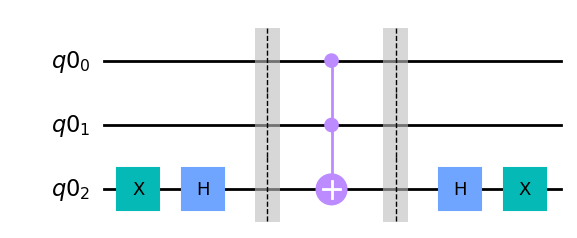

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg = QuantumRegister(3)
#No need to define classical register as we are not measuring

mycircuit = QuantumCircuit(qreg)


#
#Your code here
#
mycircuit.x(qreg[2])
mycircuit.h(qreg[2])
mycircuit.barrier()

Uf(mycircuit, qreg)

mycircuit.barrier()
mycircuit.h(qreg[2])
mycircuit.x(qreg[2])

job = execute(mycircuit,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit,decimals=3).data

#We are interested in the top-left 4x4 part
for i in range(4):
    s=""
    for j in range(4):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)


mycircuit.draw(output='mpl')

To check out our solution, run the next cell:

In [ ]:
SolutionToTask2()  # show solution for task 2

<IPython.core.display.Javascript object>

<h3>Task 3</h3>

Let $N=4$. Implement the inversion operator and check whether you obtain the following matrix:

$\mymatrix{cccc}{-0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & -0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & -0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & -0.5}$.

In [21]:
def inversion(circuit,quantum_reg):

#don't implement the first and last steps in which ancilla qubit is set


#
# your code is here
#
  for i in range(2): circuit.h(quantum_reg[i])
  for i in range(2): circuit.x(quantum_reg[i])
  circuit.ccx(quantum_reg[0], quantum_reg[1], quantum_reg[2])
  circuit.x(quantum_reg[2])
  for i in range(2): circuit.x(quantum_reg[i])
  for i in range(2): circuit.h(quantum_reg[i])

Below you can check the matrix of your inversion operator and how the circuit looks like. We are interested in the top-left $4 \times 4$ part of the matrix, the remaining parts are because we used ancilla qubit.

 -0.5  0.5  0.5  0.5
  0.5 -0.5  0.5  0.5
  0.5  0.5 -0.5  0.5
  0.5  0.5  0.5 -0.5


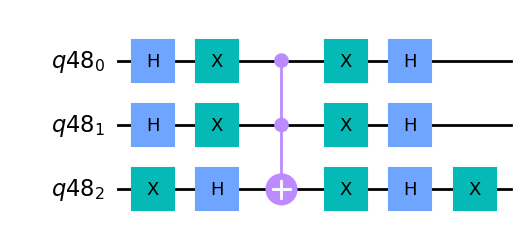

In [23]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(3)

mycircuit1 = QuantumCircuit(qreg1)

#set ancilla qubit
mycircuit1.x(qreg1[2])
mycircuit1.h(qreg1[2])

inversion(mycircuit1,qreg1)

#set ancilla qubit back
mycircuit1.h(qreg1[2])
mycircuit1.x(qreg1[2])


job = execute(mycircuit1,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit1,decimals=3).data
for i in range(4):
    s=""
    for j in range(4):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

mycircuit1.draw(output='mpl')

To check out our solution, run the next cell:

In [ ]:
SolutionToTask3()  # show solution for task 3

<h3>Task 4: Testing Grover's search</h3>

Now we are ready to test our operations and run Grover's search. Suppose that there are 4 elements in the list and try to find the marked element.

You are given the operator $U_f$. First run the following cell to load it. You can access it via <pre>Uf(circuit,qreg).</pre>
qreg[2] is the ancilla qubit and it is shared by the query and the inversion operators.
    
Which state do you observe the most?

In [6]:
quantum_file = path_files+"quantum.py"
%run $quantum_file

<Figure size 640x480 with 0 Axes>

11 is observed 10000 times


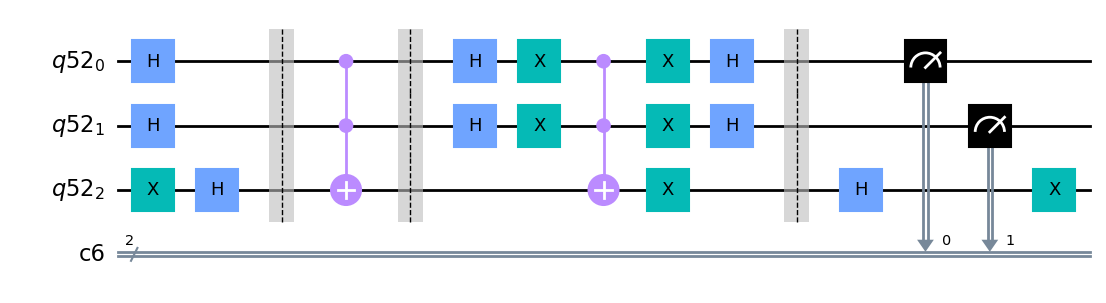

In [24]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg = QuantumRegister(3)
creg = ClassicalRegister(2)

mycircuit = QuantumCircuit(qreg,creg)

#Grover


#initial step - equal superposition
#
#your code here
#
for i in range(2): mycircuit.h(qreg[i])

#set ancilla
#
#your code here
#
mycircuit.x(qreg[2])
mycircuit.h(qreg[2])

mycircuit.barrier()

#change the number of iterations
iterations=1

#Grover's iterations.
#
#Query operator
#
#Inversion operator
#
for i in range(iterations):
  Uf(mycircuit, qreg)
  mycircuit.barrier()
  inversion(mycircuit, qreg)
  mycircuit.barrier()

#set ancilla
#
#your code here
#
mycircuit.h(qreg[2])
mycircuit.x(qreg[2])

mycircuit.measure(qreg[0],creg[0])
mycircuit.measure(qreg[1],creg[1])

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(mycircuit)

# print the outcome
for outcome in counts:
    print(outcome,"is observed",counts[outcome],"times")

mycircuit.draw(output='mpl')

To check out our solution, run the next cell:

In [ ]:
SolutionToTask4()  # show solution for task 4

<h3>Task 5 (Optional, challenging)</h3>

Implement the inversion operation for $n=3$ ($N=8$). This time you will need 5 qubits - 3 for the operation, 1 for ancilla, and one more qubit to implement not gate controlled by three qubits.

In the implementation the ancilla qubit will be qubit 3, while qubits for control are 0, 1 and 2; qubit 4 is used for the multiple control operation. As a result you should obtain the following values in the top-left $8 \times 8$ entries:

$\mymatrix{cccccccc}{-0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75}$.

In [14]:
def big_inversion(circuit,quantum_reg):


#
# your code is here
#
  for i in range(3): circuit.h(quantum_reg[i])
  for i in range(3): circuit.x(quantum_reg[i])
  circuit.ccx(quantum_reg[0], quantum_reg[1], quantum_reg[4])
  circuit.ccx(quantum_reg[2], quantum_reg[4], quantum_reg[3])
  circuit.ccx(quantum_reg[0], quantum_reg[1], quantum_reg[4])
  circuit.x(quantum_reg[3])
  for i in range(3): circuit.x(quantum_reg[i])
  for i in range(3): circuit.h(quantum_reg[i])

Below you can check the matrix of your inversion operator. We are interested in the top-left $8 \times 8$ part of the matrix, the remaining parts are because of additional qubits.

In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

big_qreg2 =  QuantumRegister(5)

big_mycircuit2 = QuantumCircuit(big_qreg2)

#set ancilla
big_mycircuit2.x(big_qreg2[3])
big_mycircuit2.h(big_qreg2[3])

big_inversion(big_mycircuit2,big_qreg2)

#set ancilla back
big_mycircuit2.h(big_qreg2[3])
big_mycircuit2.x(big_qreg2[3])

job = execute(big_mycircuit2,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(big_mycircuit2,decimals=3).data
for i in range(8):
    s=""
    for j in range(8):
        val = str(u[i][j].real)
        while(len(val)<6): val  = " "+val
        s = s + val
    print(s)

 -0.75  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25 -0.75  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25 -0.75  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25 -0.75  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25 -0.75  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25 -0.75  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25 -0.75  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25 -0.75


To check out our solution, run the next cell:

In [ ]:
SolutionToTask5()  # show solution for task 5

<IPython.core.display.Javascript object>

<h3>Task 6: Testing Grover's search for 8 elements (Optional, challenging)</h3>

Now we will test Grover's search on 8 elements.

You are given the operator $U_{f_8}$. First run the following cell to load it. You can access it via:

<pre>Uf_8(circuit,qreg)</pre>
    
Which state do you observe the most?

In [16]:
quantum_file = path_files+"quantum.py"
%run $quantum_file

<Figure size 640x480 with 0 Axes>

101 is observed 73 times
010 is observed 70 times
000 is observed 77 times
110 is observed 76 times
100 is observed 77 times
001 is observed 76 times
111 is observed 89 times
011 is observed 9462 times


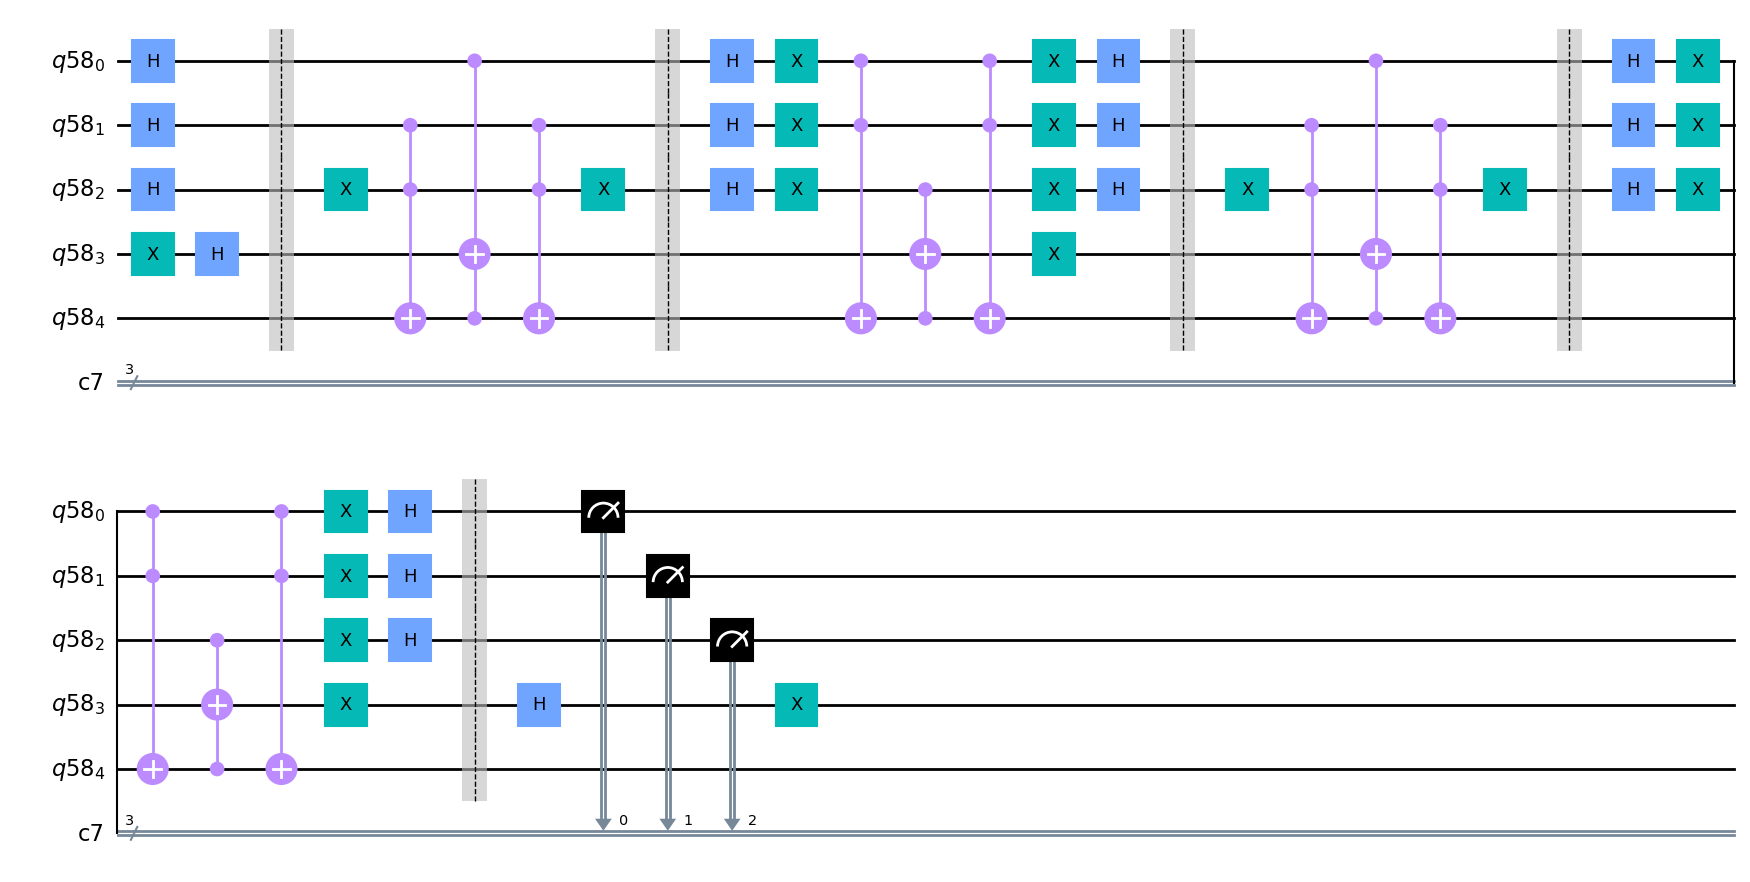

In [25]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg8 =  QuantumRegister(5)
creg8 = ClassicalRegister(3)

mycircuit8 = QuantumCircuit(qreg8,creg8)


#
#Your code here
#
for i in range(3): mycircuit8.h(qreg8[i])

mycircuit8.x(qreg8[3])
mycircuit8.h(qreg8[3])

mycircuit8.barrier()

iterations = 2

for i in range(iterations):
  Uf_8(mycircuit8, qreg8)
  mycircuit8.barrier()
  big_inversion(mycircuit8, qreg8)
  mycircuit8.barrier()

mycircuit8.h(qreg8[3])
mycircuit8.x(qreg8[3])

for i in range(3): mycircuit8.measure(qreg8[i], creg8[i])

job = execute(mycircuit8,Aer.get_backend('qasm_simulator'),shots=10000)
counts8 = job.result().get_counts(mycircuit8)
# print the reverse of the outcome
for outcome in counts8:
    print(outcome,"is observed",counts8[outcome],"times")

mycircuit8.draw(output='mpl')

To check out our solution, run the next cell:

In [ ]:
SolutionToTask6()  # show solution for task 6

<h3>Task 7 (optional)</h3>

Do you remember the optimal number of iterations to find the marked element with Grover's search? You are given the following code which implements Grover's search. (<i>giant_oracle</i> and <i>giant_diffusion</i> are already implemented.) There is a single marked element. First, determine the total number of elements in the search space. After that, try to find the optimal number of iterations. You can check your guess by changing the value of <i>iteration_count</i>. Please also check less optimal options like <i>iteration_count-1</i>, <i>iteration_count+1</i>.
    
Try also calling <i>giant_oracle2</i> which marks 2 elements and try to find out the optimal number of iterations.

In [26]:
quantum_file = path_files+"quantum.py"
%run $quantum_file

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg12 =  QuantumRegister(19)
creg12 = ClassicalRegister(10)

mycircuit12 = QuantumCircuit(qreg12,creg12)

for i in range(10):
    mycircuit12.h(qreg12[i])

mycircuit12.x(qreg12[10])
mycircuit12.h(qreg12[10])

#number of iterations - change this value
iteration_count = 3
for i in range(iteration_count):
    giant_oracle2(mycircuit12,qreg12)
    giant_diffusion(mycircuit12,qreg12)

mycircuit12.h(qreg12[10])
mycircuit12.x(qreg12[10])

for i in range(10):
    mycircuit12.measure(qreg12[i],creg12[i])

job = execute(mycircuit12,Aer.get_backend('qasm_simulator'),shots=100000)
counts12 = job.result().get_counts(mycircuit12)
# print the reverse of the outcome
for outcome in counts12:
    print(outcome,"is observed",counts12[outcome],"times")

0011001010 is observed 105 times
0010010010 is observed 96 times
1100000000 is observed 69 times
1000111000 is observed 77 times
0100101001 is observed 86 times
0110100101 is observed 96 times
1000000011 is observed 91 times
1111111110 is observed 106 times
0000101110 is observed 89 times
1100011110 is observed 82 times
0000110011 is observed 96 times
0111110100 is observed 103 times
1010111111 is observed 75 times
0111000010 is observed 83 times
0101001100 is observed 93 times
1110100110 is observed 112 times
1111111101 is observed 79 times
1110001100 is observed 93 times
1010111000 is observed 77 times
1111111010 is observed 84 times
1111010000 is observed 83 times
1001100111 is observed 76 times
1010000101 is observed 80 times
0110011000 is observed 86 times
1101011011 is observed 75 times
1000111110 is observed 94 times
0111011110 is observed 95 times
1001011001 is observed 95 times
0100101011 is observed 87 times
1001100010 is observed 90 times
0110111111 is observed 76 times
1001

<Figure size 640x480 with 0 Axes>

<h3>Task 8</h3>

Implement an oracle function which marks the element $\ket{00}$. Run Grover's search with the oracle you have implemented.

In [27]:
def oracle_00(circuit,qreg):
    #Your code here
    #
    #
    for i in range(2): circuit.x(qreg[i])
    circuit.ccx(qreg[0], qreg[1], qreg[2])
    for i in range(2): circuit.x(qreg[i])

00 is observed 10000 times


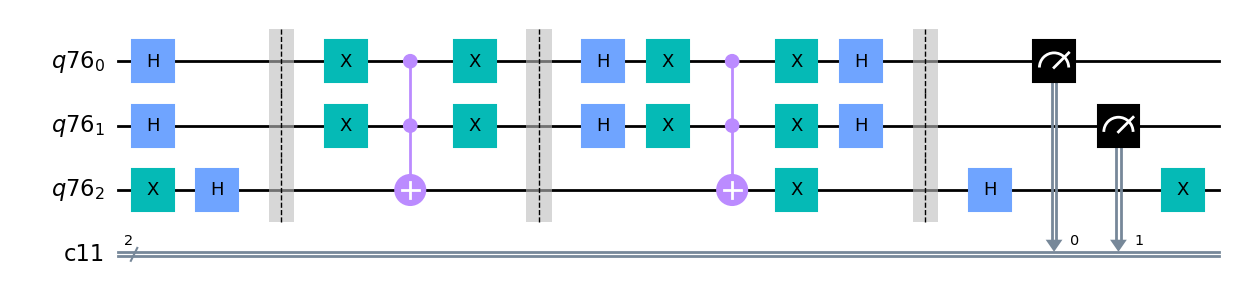

In [30]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

#Grover's search
qreg4 = QuantumRegister(3)
creg4 = ClassicalRegister(2)
qc = QuantumCircuit(qreg4, creg4)

for i in range(2): qc.h(qreg4[i])

qc.x(qreg4[2])
qc.h(qreg4[2])

qc.barrier()

oracle_00(qc, qreg4)
qc.barrier()
inversion(qc, qreg4)
qc.barrier()

qc.h(qreg4[2])
qc.x(qreg4[2])

for i in range(2): qc.measure(qreg4[i], creg4[i])

job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 10000)
counts = job.result().get_counts(qc)
for outcome in counts:
  reverse_outcome = ''
  for i in outcome:
    reverse_outcome = i + reverse_outcome
  print(f"{reverse_outcome} is observed {counts[outcome]} times")
qc.draw(output = 'mpl')

To check out our solution, run the next cell:

In [ ]:
SolutionToTask8()  # show solution for task 8

<IPython.core.display.Javascript object>

<h3>Task 9 (Optional)</h3>

Let $N=8$. Implement an oracle function which marks the elements $\ket{001}$ and $\ket{111}$. Run Grover's search with the oracle you have implemented.

In [31]:
def oracle_001_111(circuit,qreg):
    #Your code here
    #
    #
    for i in range(2): circuit.x(qreg[i])
    circuit.ccx(qreg[0], qreg[1], qreg[4])
    circuit.ccx(qreg[2], qreg[4], qreg[3])
    circuit.ccx(qreg[0], qreg[1], qreg[4])
    for i in range(2): circuit.x(qreg[i])

    circuit.ccx(qreg[0], qreg[1], qreg[4])
    circuit.ccx(qreg[2], qreg[4], qreg[3])
    circuit.ccx(qreg[0], qreg[1], qreg[4])

111 is observed 4922 times
001 is observed 5078 times


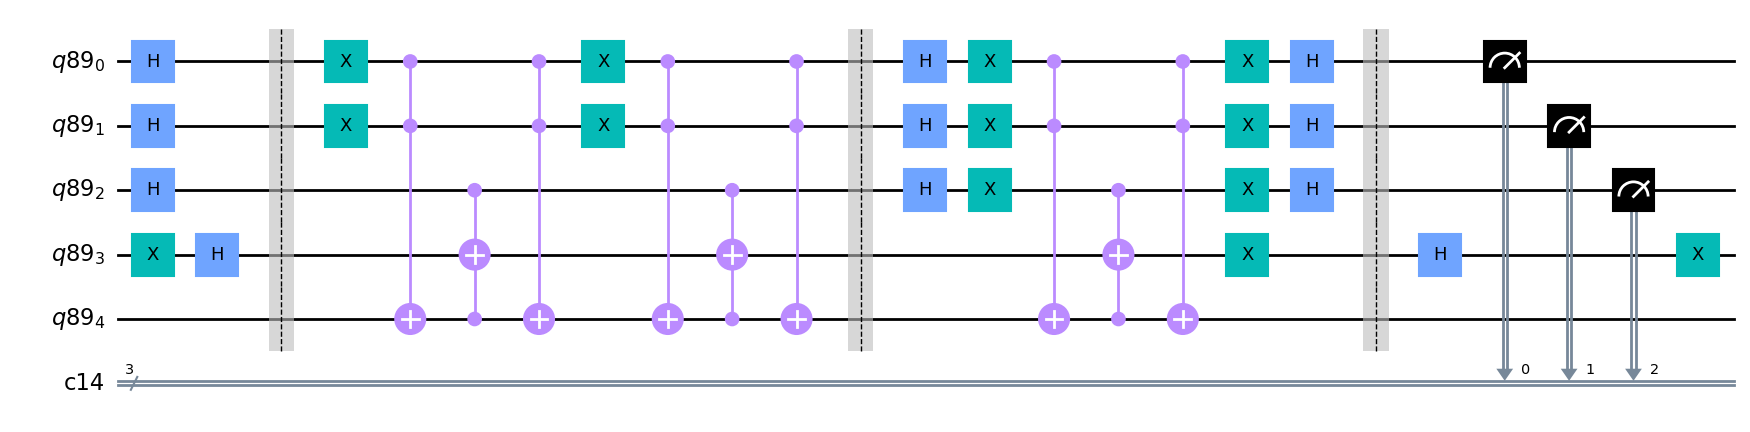

In [34]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

#Grover's search
qreg8 = QuantumRegister(5)
creg8 = ClassicalRegister(3)
qc8 = QuantumCircuit(qreg8, creg8)

for i in range(3): qc8.h(qreg8[i])

qc8.x(qreg8[3])
qc8.h(qreg8[3])

qc8.barrier()

for i in range(1):
  oracle_001_111(qc8, qreg8)
  qc8.barrier()
  big_inversion(qc8, qreg8)
  qc8.barrier()

qc8.h(qreg8[3])
qc8.x(qreg8[3])

for i in range(3): qc8.measure(qreg8[i], creg8[i])

job = execute(qc8, Aer.get_backend('qasm_simulator'), shots = 10000)
counts = job.result().get_counts(qc8)
for outcome in counts:
  reverse_outcome = ''
  for i in outcome:
    reverse_outcome = i + reverse_outcome
  print(f"{reverse_outcome} is observed {counts[outcome]} times")
qc8.draw(output = 'mpl')